# Titanic Dataset
Data Analysis on Titanic Data (Python)
***

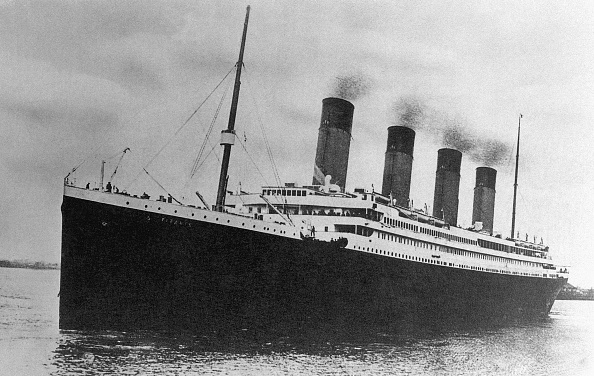

# Introduction

# Data Dictionary

* **'Survival':** 	 0 = No, 1 = Yes
* **'Pclass':** 	 Ticket class 	 1 = 1st, 2 = 2nd, 3 = 3rd
* **'Sex':** 	 Sex
* **'Age':**	 Age in years
* **'SibSp':** 	 # of siblings / spouses aboard the Titanic
* **'Parch':** 	 # of parents / children aboard the Titanic
* **'Ticket':** 	 Ticket number
* **'Fare':** 	 Passenger fare
* **'Cabin':** 	 Cabin number
* **'Embarked':** 	 Port of Embarkation 	 C = Cherbourg, Q = Queenstown, S = Southampton

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy import stats

# Load and View Data

In [3]:
df = pd.read_csv(r"C:\Users\Dell\CSV_FILE\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Last Five Rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Show all column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Counting rows and coulums
col_row = df.shape
print('Columns in dataset:', col_row[1],'\nRows in dataset:', col_row[0])

Columns in dataset: 12 
Rows in dataset: 891


In [11]:
# Total cells in the dataset
total_cells=np.product(df.shape)
print('Total cells in this dataset:',total_cells)

Total cells in this dataset: 10692


# Data Cleaning

## Identifying duplicate values

In [12]:
df.duplicated().sum()

0

In [14]:
df.loc[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


`No duplicates values in this dataset`

## Identifying missing values

In [15]:
# Find the amount of missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [16]:
# Calculating the percentage of missing values:

# 1. Set variables for total amount of cells and total amount of missing data
total_missing = missing_values.sum()

# 2. Calculating percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print("Total missing values: {}  =  {:.2f} %".format(total_missing, percent_missing))

Total missing values: 866  =  8.10 %


In [17]:
number_missing = df.isnull().sum().sort_values(ascending=False)
pct_column = (df.isnull().sum() / len(df) * 100).round(2).astype('str')+' %'
pct_total = (df.isnull().sum()/df.isna().sum().sum()*100).round(2).astype('str')+' %'
missing_values = pd.concat([number_missing, pct_column, pct_total], axis=1, keys=['Number_Missing_Values', 'PCT_Missing_in_Column','PCT_of_all_Missing'])
   
print('\nMISSING VALUES IN',df.shape[0],'ROWS:')    
all_missing = missing_values.loc[missing_values['Number_Missing_Values'] > 0]
all_missing


MISSING VALUES IN 891 ROWS:


,Number_Missing_Values,PCT_Missing_in_Column,PCT_of_all_Missing
Cabin,687,77.1 %,79.33 %
Age,177,19.87 %,20.44 %
Embarked,2,0.22 %,0.23 %


## Visualisation of missing data

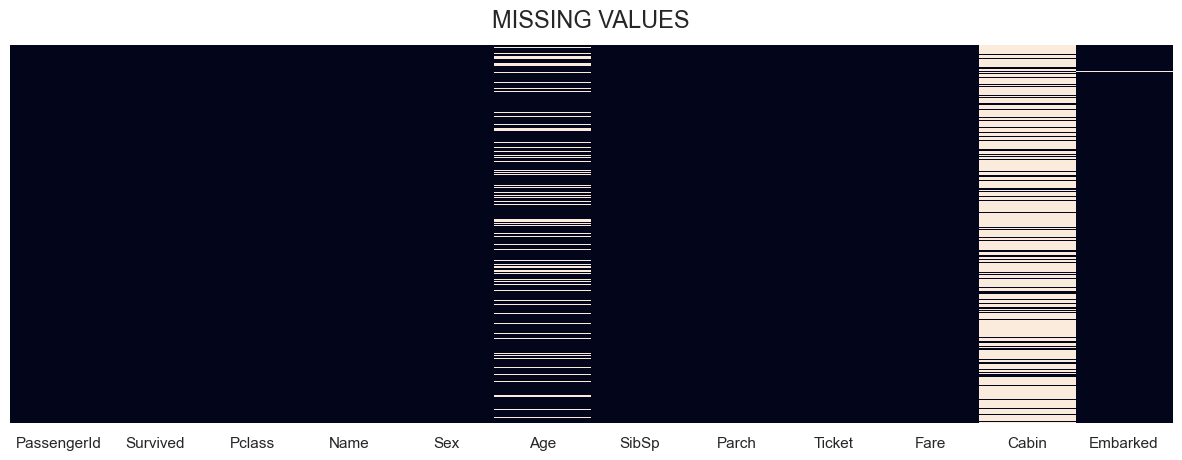

In [18]:
# Detect missing values
missing = df.isnull()

# Visualisation
plt.figure(figsize=(15,5), dpi=100)
sns.heatmap(missing,yticklabels=False, cbar=False, cmap=None)
plt.title('MISSING VALUES', size=17, pad=13)
plt.show()

`We can observe the graph the highest number of missing values in the 'Cabin' column.`

## Dealing with missing values

**Drop data**
*     Drop the whole row
*     Drop the whole column

*or*

**Replace data**
*     Replace it by mean / median
*     Replace it by frequency
*     Replace it based on other functions

Choosing a method based on the composition and correlation of the data and the task or goal settings.

#### Looking at the columns with missing data

***
`Embarked`
***

In [20]:
# Only two values are missing in the 'Embarked' column. Let's check the corresponding rows.
df[pd.isnull(df.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
# Checking and counting the values in the 'Embarked' column.
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
# As only two values are missing (0.22%), I decided to replace them by the most listed value.
df["Embarked"] = df["Embarked"].fillna("S")

In [23]:
# ... and if the values have benn replaced by 'S'
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

***
`Cabin`
***

As **most of the data in the column "Cabin" is missing** (687 out of 891 values --> **77%**), and I do not need the column for my analysis I deciced to **delete the column** - deleting the rows would remove 687 useful rows.

In [24]:
# Deleting the column
df.drop("Cabin", axis=1, inplace=True)

In [25]:
# Checking if the column "Cabin" are deleted
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


***
`Age`
***

Looking for the best way to fill the missing data

In [26]:
df.Age.describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


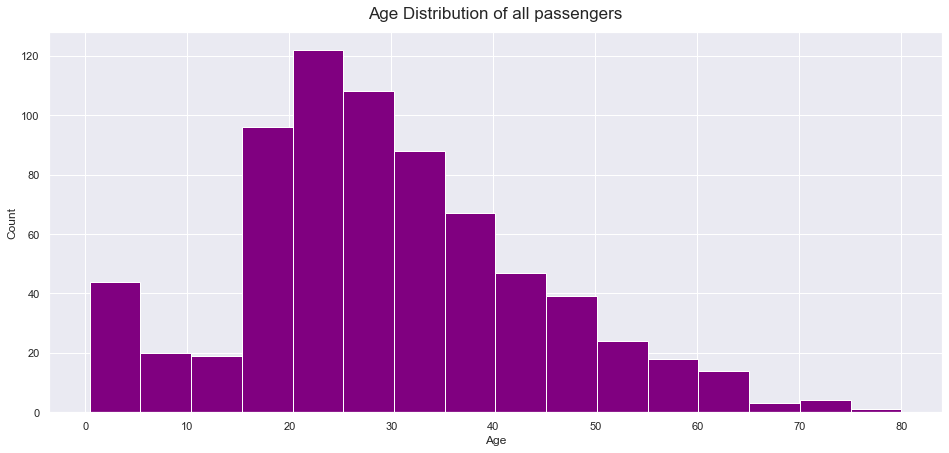

In [27]:
# The histogramm shows the age distribution of all passengers
df['Age'].hist(bins=16, color='purple' ,figsize=(16,7))
plt.title('Age Distribution of all passengers', size=17, pad=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

`"The graph above illustrates the peak distribution of ages, primarily concentrated between 15 to 40 years."`

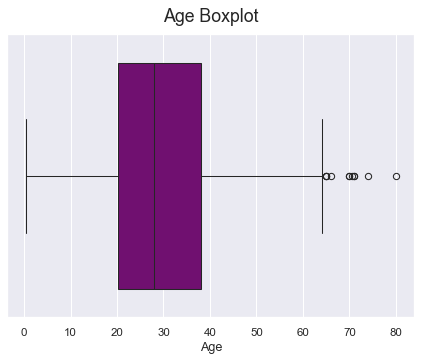

In [30]:
plt.figure(figsize=(7,5), dpi=75)
sns.boxplot(x="Age", data=df, color='purple')
plt.title('Age Boxplot', size=17, pad=13)
plt.show()

In [31]:
# Mean age vs. median
display(df.Age.mean())
display(df.Age.median())

29.69911764705882

28.0

The **average age** of all people on board is **29.7**. The **middle value** is **28**.
Replacing the missing values with the mean or the median would be inacurate. I would like to find out the average age of men and women in each class and check if there is a difference and if there might be further correlations.

In [32]:
# Grouping Column 'Sex' to see the average age or women and men
grouped_sex_age = df.groupby(['Sex']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_age

,len,min,max,mean,median
Sex,,,,,
female,314,0.75,63.0,27.915709,27.0
male,577,0.42,80.0,30.726645,29.0


In [33]:
# Grouping the 'Pclass' to see if the average age changes from class to class
grouped_class_age = df.groupby(['Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_class_age

,len,min,max,mean,median
Pclass,,,,,
1,216,0.92,80.0,38.233441,37.0
2,184,0.67,70.0,29.877630,29.0
3,491,0.42,74.0,25.140620,24.0


**As the average age seem to depend on both, sex and class.**

In [35]:
# Checking the (average) age and amount of people for each class and sex
grouped_sex_pclass_age = df.groupby(['Sex', 'Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len   min   max       mean  median
Sex    Pclass                                    
female 1        94  2.00  63.0  34.611765    35.0
       2        76  2.00  57.0  28.722973    28.0
       3       144  0.75  63.0  21.750000    21.5
male   1       122  0.92  80.0  41.281386    40.0
       2       108  0.67  70.0  30.740707    30.0
       3       347  0.42  74.0  26.507589    25.0

**The average age in each class and sex is very different. There also seems to be a correlation between Age and SibSp. 
In my opinion this needs to be considered when replacing the missing values**.

In [36]:
# Checking the age and amount of people for each class and sex and SibSp
grouped_sex_pclass_age = df.groupby(['Pclass', 'SibSp']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len    min   max       mean  median
Pclass SibSp                                     
1      0      137   4.00  80.0  39.181416    37.0
       1       71   0.92  70.0  37.414154    38.0
       2        5  18.00  53.0  37.200000    44.0
       3        3  19.00  24.0  22.000000    23.0
2      0      120   0.83  70.0  31.934220    30.0
       1       55   0.67  60.0  27.363636    29.0
       2        8   1.00  32.0  19.125000    23.5
       3        1  30.00  30.0  30.000000    30.0
3      0      351   0.42  74.0  27.630201    26.0
       1       83   1.00  48.0  24.912698    25.0
       2       15   0.75  41.0  18.875000    19.5
       3       12   2.00  33.0   8.875000     6.0
       4       18   1.00  17.0   7.055556     6.5
       5        5   1.00  16.0  10.200000    11.0
       8        7    NaN   NaN        NaN     NaN

In [37]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

In [38]:
# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [39]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [40]:
# Checking the new column and values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


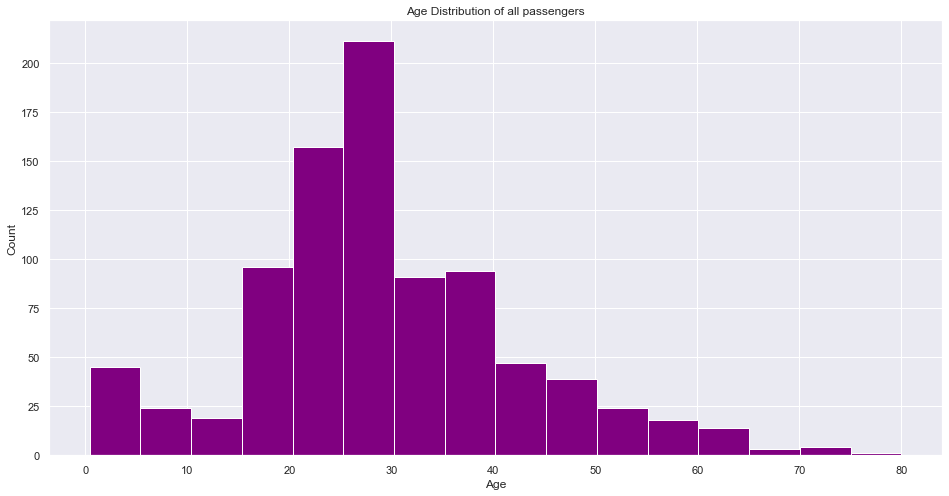

In [51]:
# The histogramm shows the age distribution of all passengers after replacing the missing values
df['Age_Filled'].hist(bins=16, color='purple' ,figsize=(16,8))
plt.title('Age Distribution of all passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

`"The graph above illustrates the peak distribution of ages, primarily concentrated between 15 to 40 years."`

***
`Fare`
***

In [52]:
# Drop whole row with NaN in "price" column
df.dropna(subset=["Fare"],axis=0 , inplace=True)

# Reset index, because two rows were dropped
df.reset_index(drop=True, inplace=True)

df[pd.isnull(df['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled


# Analysing Patterns using Visualisations

In [53]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891,887.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,29.344611
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,13.345281
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.420000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,22.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,27.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,36.250000


In [54]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Age_Filled   887 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


The data type of 'Sex' is an object, which will not be visible in a correlation. I would like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'

In [55]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,0


## Correlation

In [58]:
# Correlation table including the new column 'SexNo'
correlation = df.corr(numeric_only=True)
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Filled,Sex_Number
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042890,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.062551,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.400135,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.275001,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.181881,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.118283,0.182333
Age_Filled,0.042890,-0.062551,-0.400135,1.000000,-0.275001,-0.181881,0.118283,1.000000,-0.106356
Sex_Number,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,-0.106356,1.000000


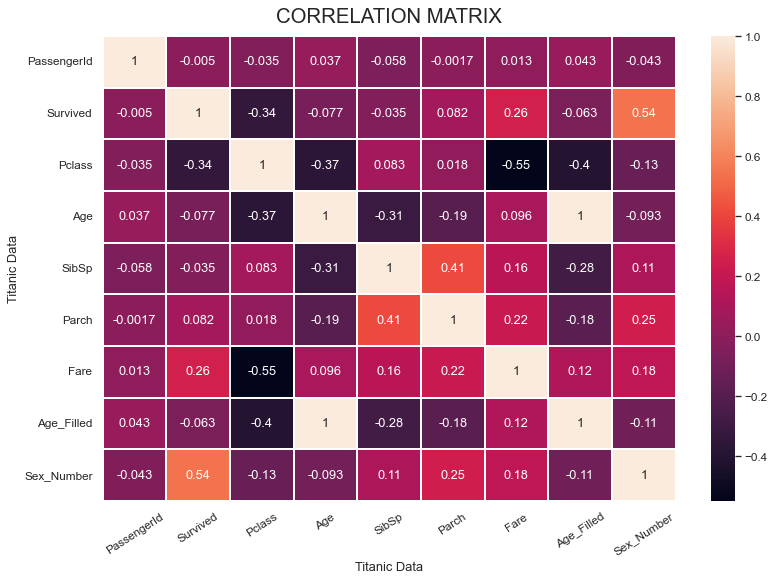

In [59]:
# Visualisation of the corralation table
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

**This matrix shows that there is a correlation between sex and the chance to survive.** There is also a correlation between fare and the chance to survive, as well as a **negative correlation between the class and the chance to survive**.

## P-values

In [60]:
# Correlation and P-value of 'Survived' and 'Sex'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Sex_Number'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.543351380657756  with a P-value of P = 1.406066130879422e-69


In [62]:
# Correlation and P-value of 'Survived' and 'Fare'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.25730652238496243  with a P-value of P = 6.1201893419246185e-15


In [63]:
# Correlation and P-value of 'Survived' and 'Pclass'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Pclass'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.33848103596101514  with a P-value of P = 2.5370473879814938e-25


## Continuous Numerical Variables

### Linear Relationship

***
`Age` and `Fare`
***

In [64]:
df[["Age_Filled","Fare"]].corr()

,Age_Filled,Fare
Age_Filled,1.000000,0.118283
Fare,0.118283,1.000000


(0.1, 83.979)

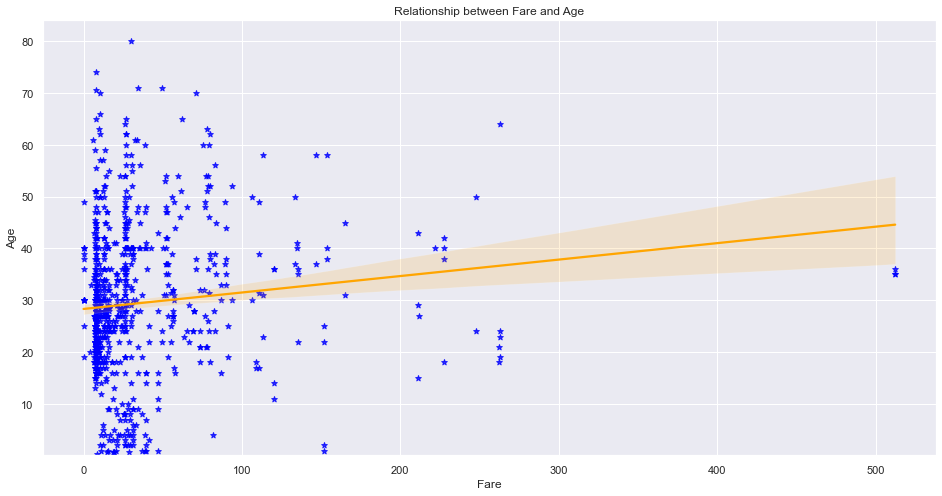

In [66]:
plt.figure(figsize=(16,8))
sns.regplot(x="Fare", y="Age_Filled",data=df, scatter_kws={'color':'blue'}, line_kws={'color':'orange'}, marker='*')
plt.title('Relationship between Fare and Age')
plt.ylabel('Age')
plt.ylim(0.1,)

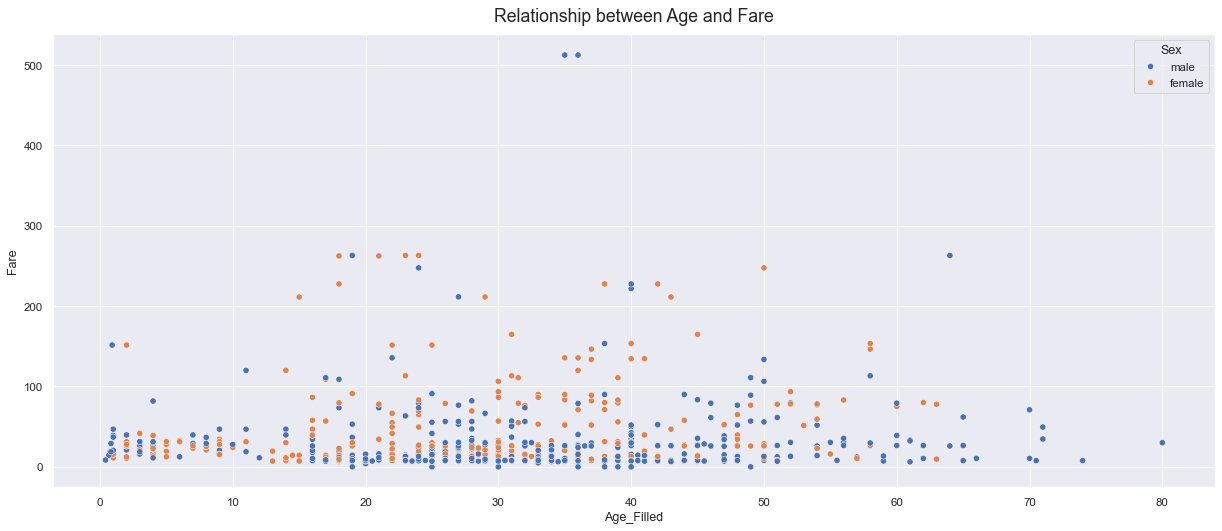

In [67]:
plt.figure(figsize=(20,8), dpi=75)
sns.scatterplot(x='Age_Filled', y='Fare', hue='Sex', data = df)
plt.title('Relationship between Age and Fare', size=17, pad=13)
plt.show()

## Categorical Variables

***
`Sex`
***

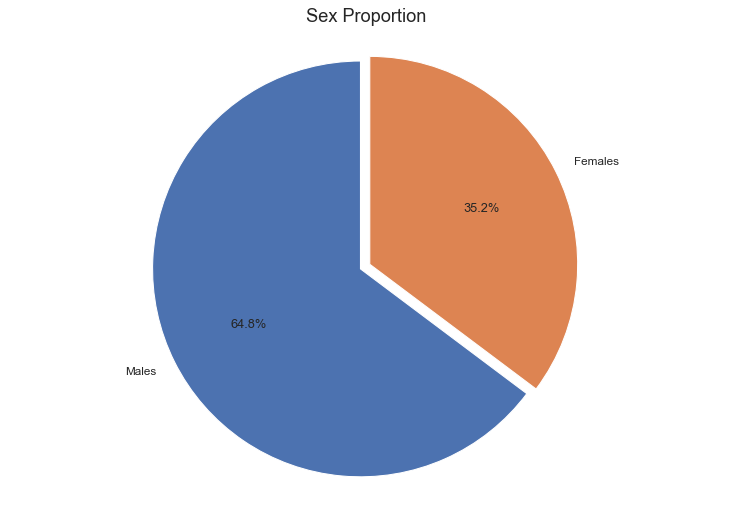

In [68]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

***
`Survived`
***

In [69]:
# How many people survived
survived_data=df.Survived.value_counts().to_frame()
survived_data

,count
Survived,
0,549
1,342


In [70]:
pd.pivot_table(df, index="Survived", values=['Pclass','Age_Filled','SibSp', 'Parch', 'Fare'])


,Age_Filled,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.005505,22.117887,0.329690,2.531876,0.553734
1,28.291433,48.395408,0.464912,1.950292,0.473684


***
`Survived` and `Age`
***

In [71]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,549,1.00,74.0,30.626179,28.0
1,342,0.42,80.0,28.343690,28.0


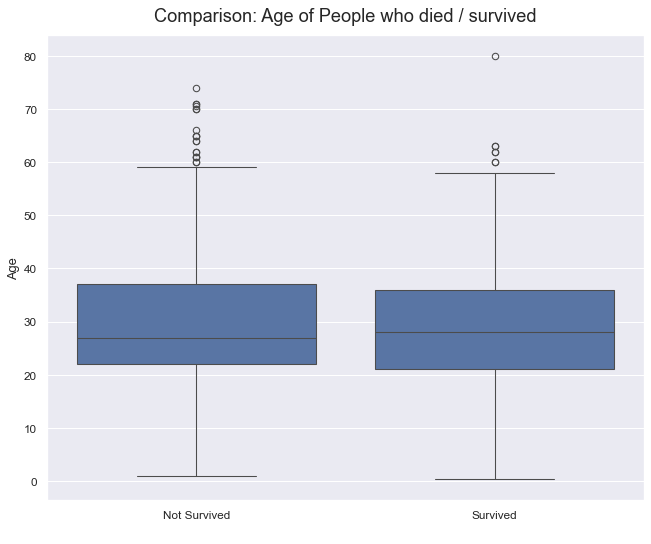

In [72]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

`"We can observe from the graph that the highest number of people who survived and did not survive fall within the age range of 20 to 40."`

***
`Survived` and `Sex`
***

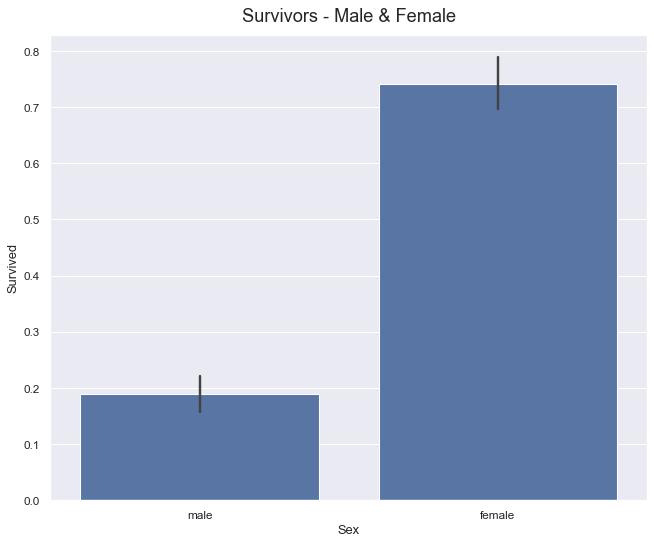

In [73]:
# The barplot compares the survival of men to women
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

`"According to the graph, females have the highest survival rate compared to males."`

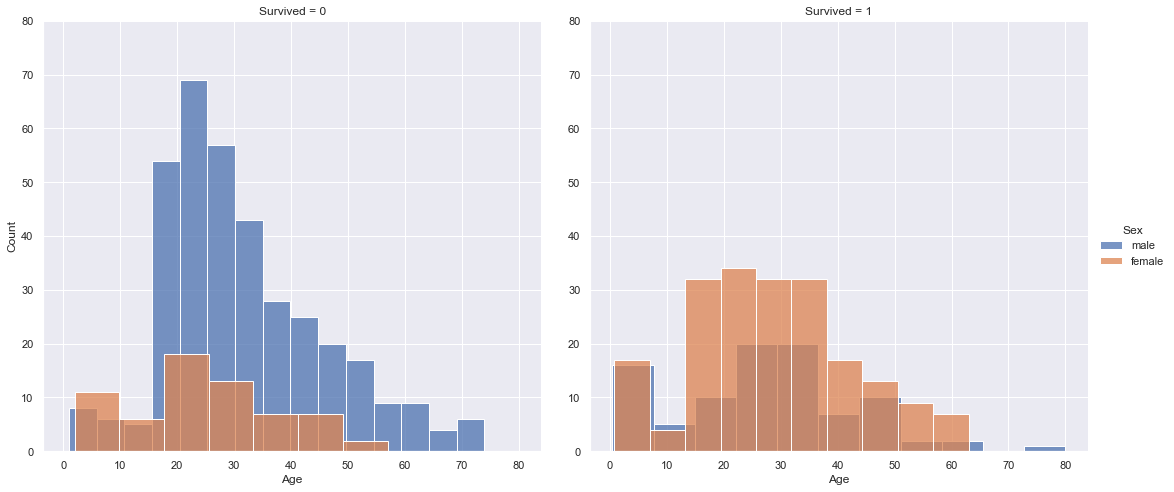

In [74]:
# Sex and Age compared with Survived and Not Survived
g = sns.FacetGrid(df, col='Survived', sharey=False, ylim=(0,80), hue='Sex', height=7, aspect=1.1)
g.map_dataframe(sns.histplot, x='Age')
g.set_axis_labels('Age', 'Count')
g.add_legend()
plt.show()

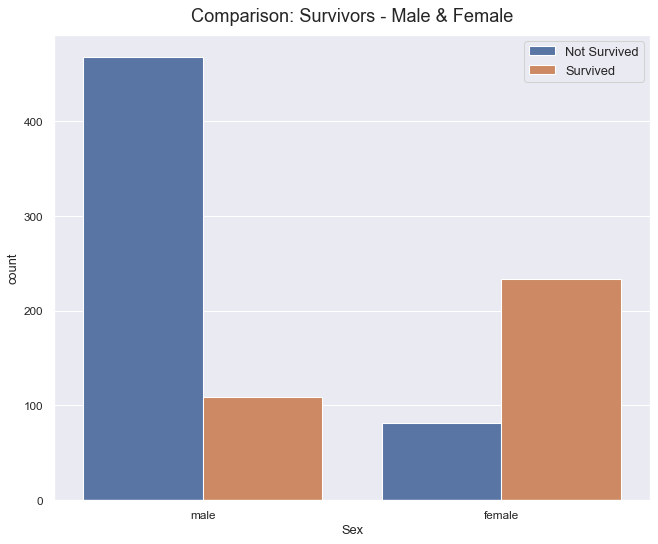

In [75]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [76]:
# Amount and average age of women and man who survived compared to those who died.
df.groupby(['Sex','Survived']).Age.agg([len,'mean', 'median'])

len       mean  median
Sex    Survived                        
female 0          81  25.046875    24.5
       1         233  28.847716    28.0
male   0         468  31.618056    29.0
       1         109  27.276022    28.0

`The data highlights a clear trend: women had a significantly higher chance of survival compared to men, with survivors generally being younger regardless of gender.`

In [77]:
# Percentage of women who survived
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived: {:.2f}".format(rate_women))

% of women who survived: 74.20


In [78]:
# Percentage of men who survived
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100

print("% of men who survived: {:.2f}".format(rate_men))

% of men who survived: 18.89


***
`Survived` and `Pclass`
***

In [79]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [80]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0          80
       1         136
2      0          97
       1          87
3      0         372
       1         119

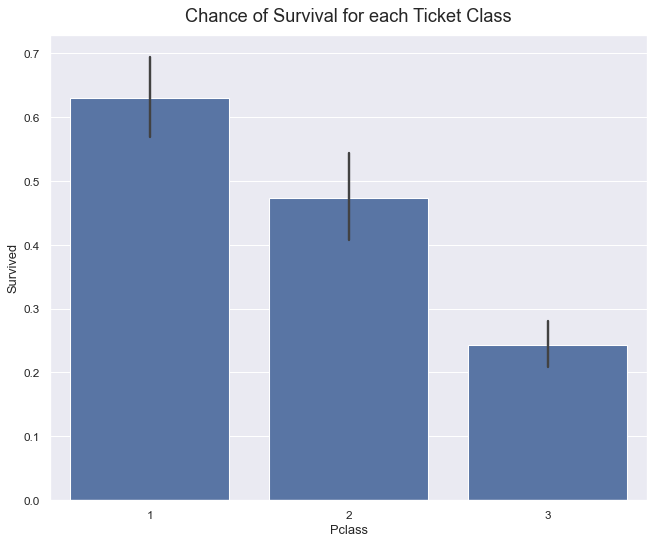

In [81]:
# Compares the chance of survival for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

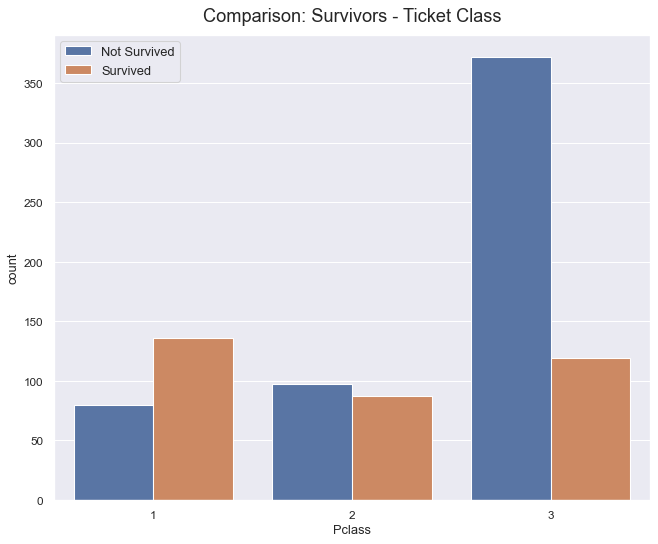

In [82]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

***
`Survived`, `Pclass`, `Sex` and `Age`
***

In [83]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  23.818182
       1        1        91  14.00  63.0  34.939024
                2        70   2.00  55.0  28.080882
                3        72   0.75  63.0  19.329787
male   0        1        77  18.00  71.0  44.581967
                2        91  16.00  70.0  33.369048
                3       300   1.00  74.0  27.255814
       1        1        45   0.92  80.0  36.248000
                2        17   0.67  62.0  16.022000
                3        47   0.42  45.0  22.274211

***
`Survived` and `Parch`
***

In [84]:
df['Parch'].value_counts().to_frame()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


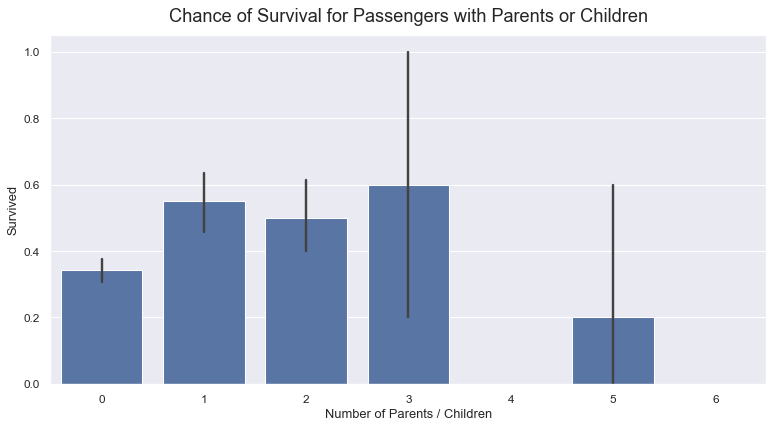

In [85]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

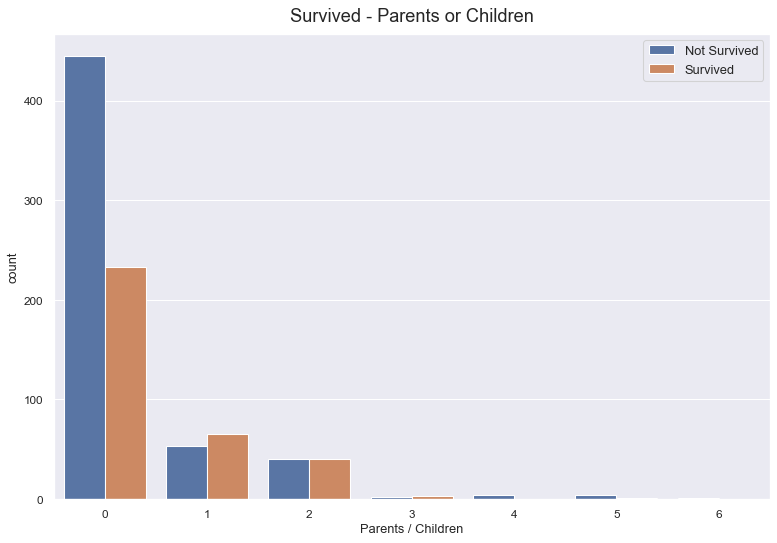

In [86]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [87]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         445  11.00  74.0
      1         233   5.00  80.0
1     0          53   1.00  70.0
      1          65   0.42  60.0
2     0          40   1.00  58.0
      1          40   0.83  48.0
3     0           2  16.00  48.0
      1           3  24.00  54.0
4     0           4  29.00  64.0
5     0           4  39.00  41.0
      1           1  38.00  38.0
6     0           1  43.00  43.0

***
`Survived` and `SibSp`
***

In [88]:
df.SibSp.value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [89]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         398  32.677365
      1         210  29.232857
1     0          97  31.848837
      1         112  28.530103
2     0          15  26.000000
      1          13  18.318182
3     0          12   7.125000
      1           4  27.500000
4     0          15   6.800000
      1           3   8.333333
5     0           5  10.200000
8     0           7        NaN

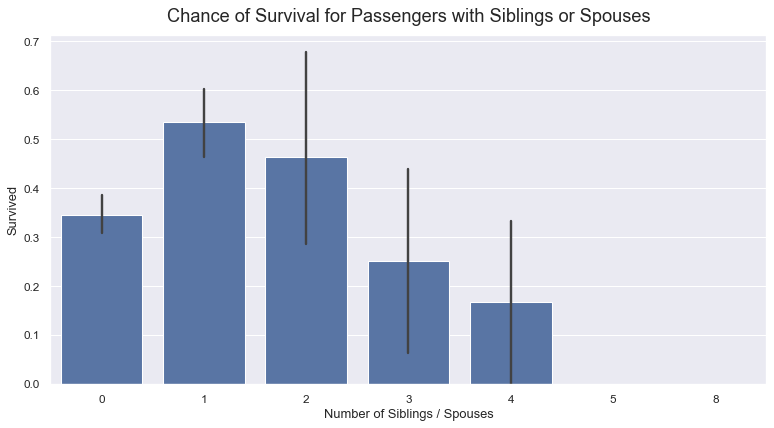

In [90]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

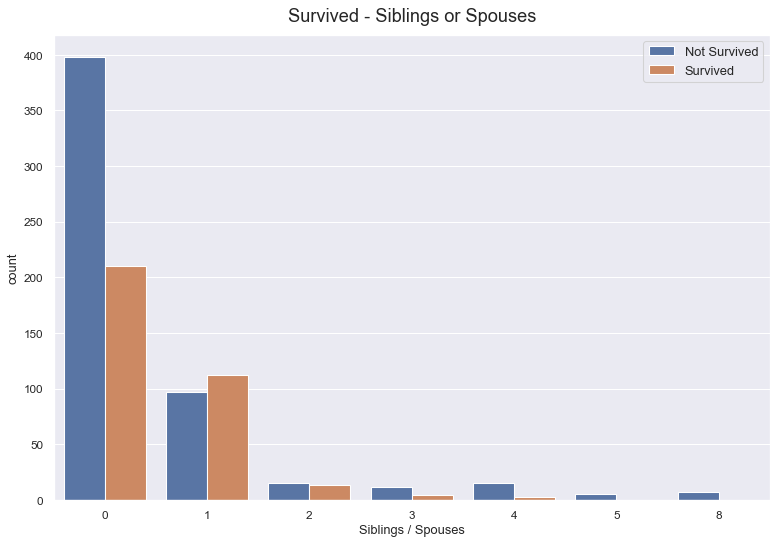

In [91]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [92]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         398   2.00  74.0  32.677365
      1         210   0.42  80.0  29.232857
1     0          97   2.00  70.0  31.848837
      1         112   0.67  63.0  28.530103
2     0          15   9.00  44.0  26.000000
      1          13   0.75  53.0  18.318182
3     0          12   2.00  19.0   7.125000
      1           4  23.00  33.0  27.500000
4     0          15   1.00  16.0   6.800000
      1           3   3.00  17.0   8.333333
5     0           5   1.00  16.0  10.200000
8     0           7    NaN   NaN        NaN

***
`Survived` and `Embarked`
***

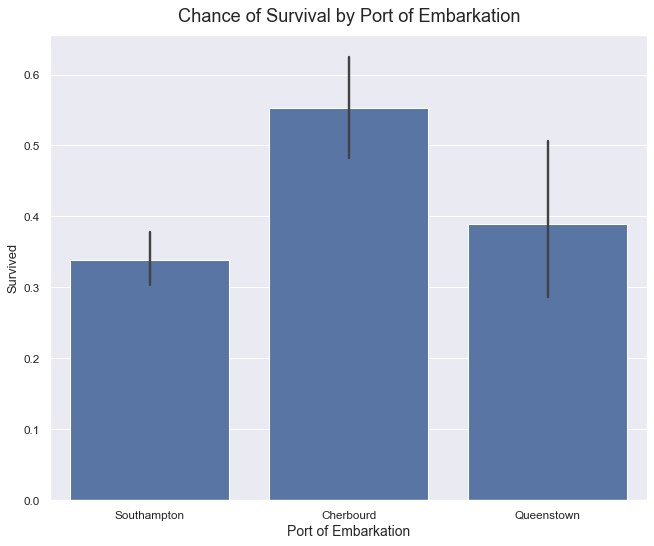

In [93]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

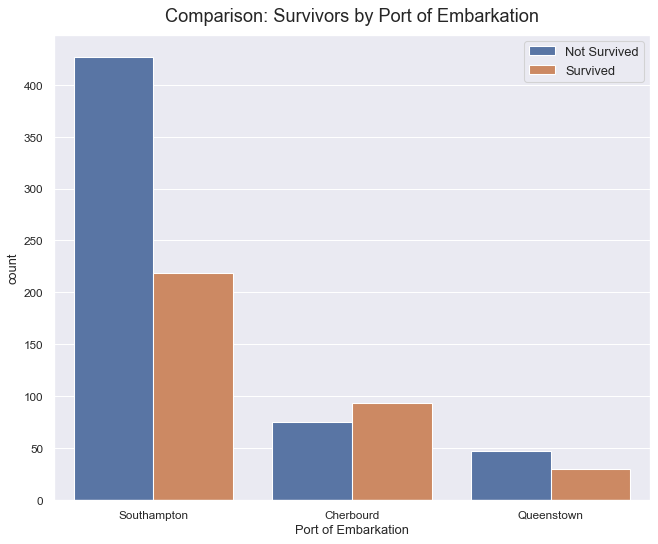

In [94]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

***
`Age` and `SibSp`
***

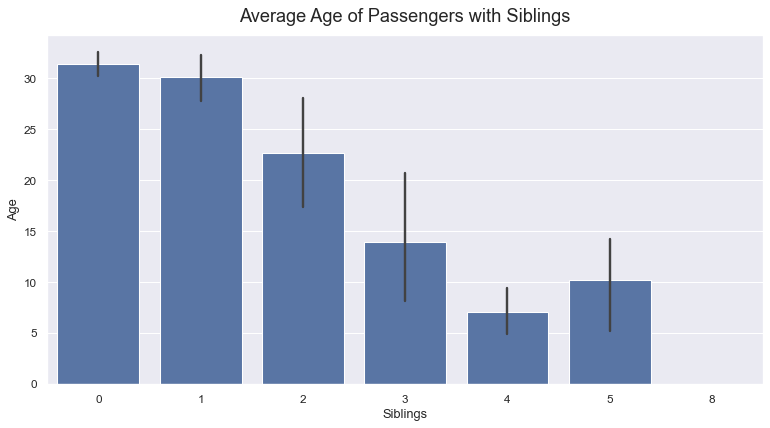

In [95]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

***
`Age` and `Parch`
***

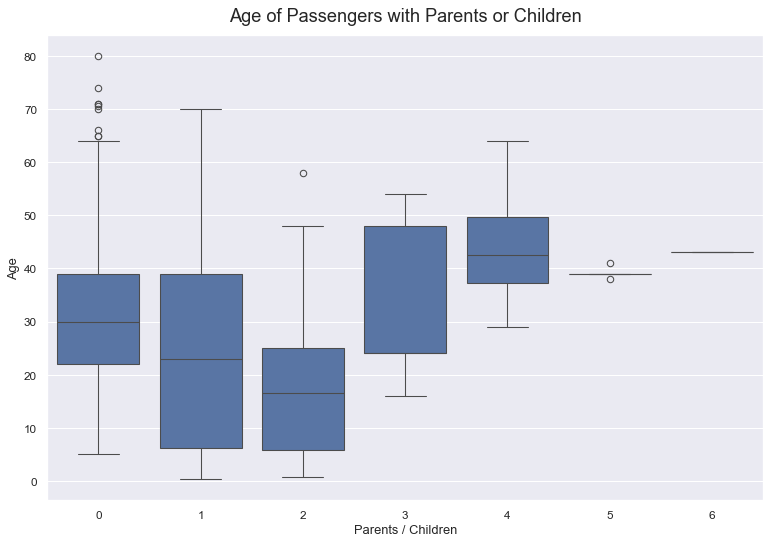

In [96]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

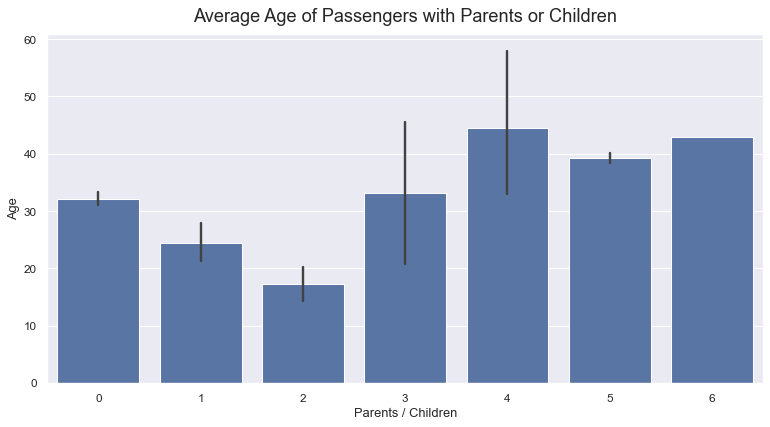

In [97]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

***
`Age` and `Pclass`
***

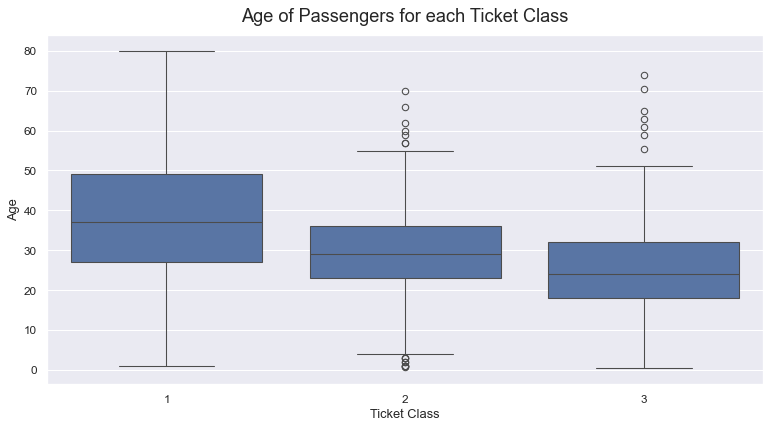

In [99]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

### Comparing multiple columns

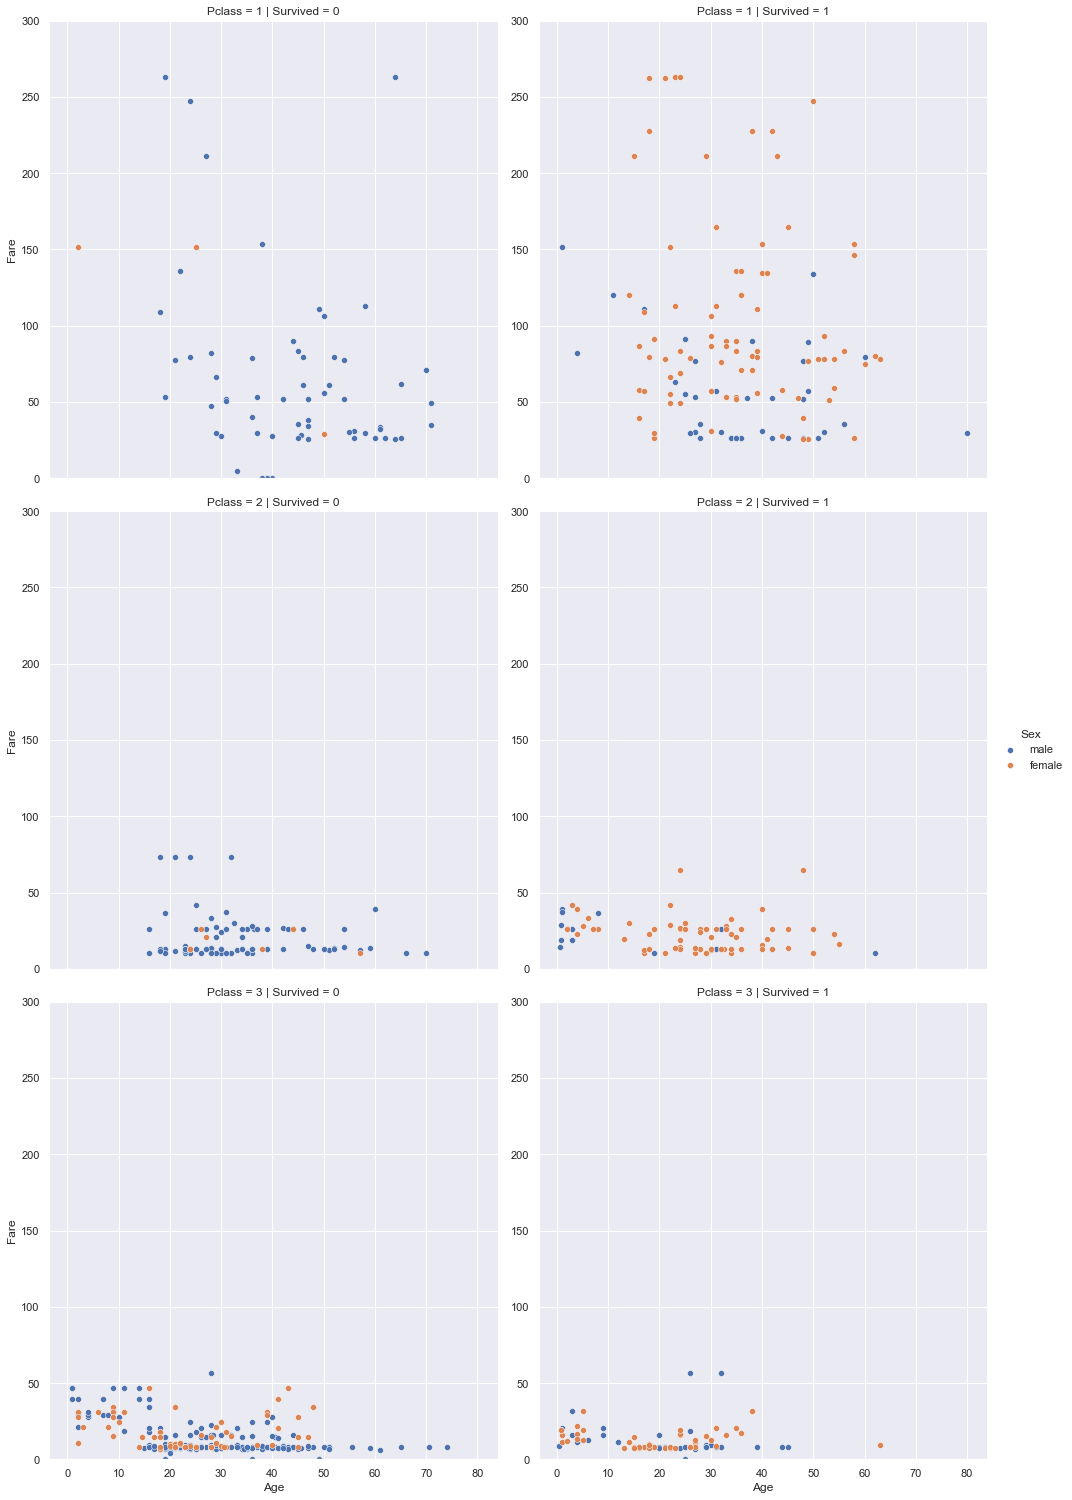

In [100]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

***
`Fare`
***

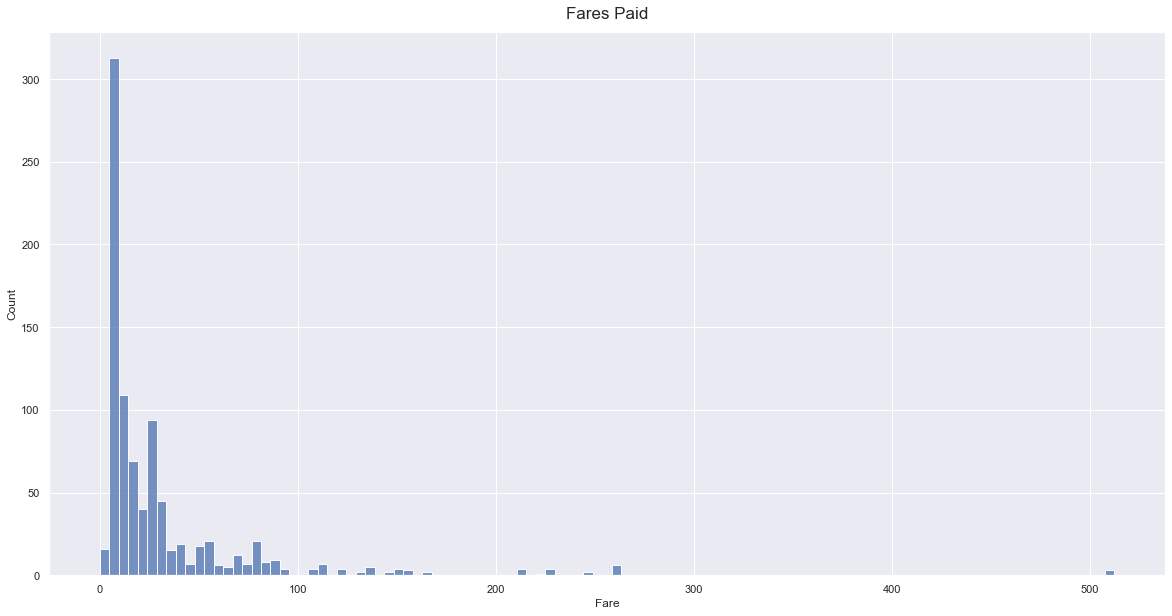

In [101]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

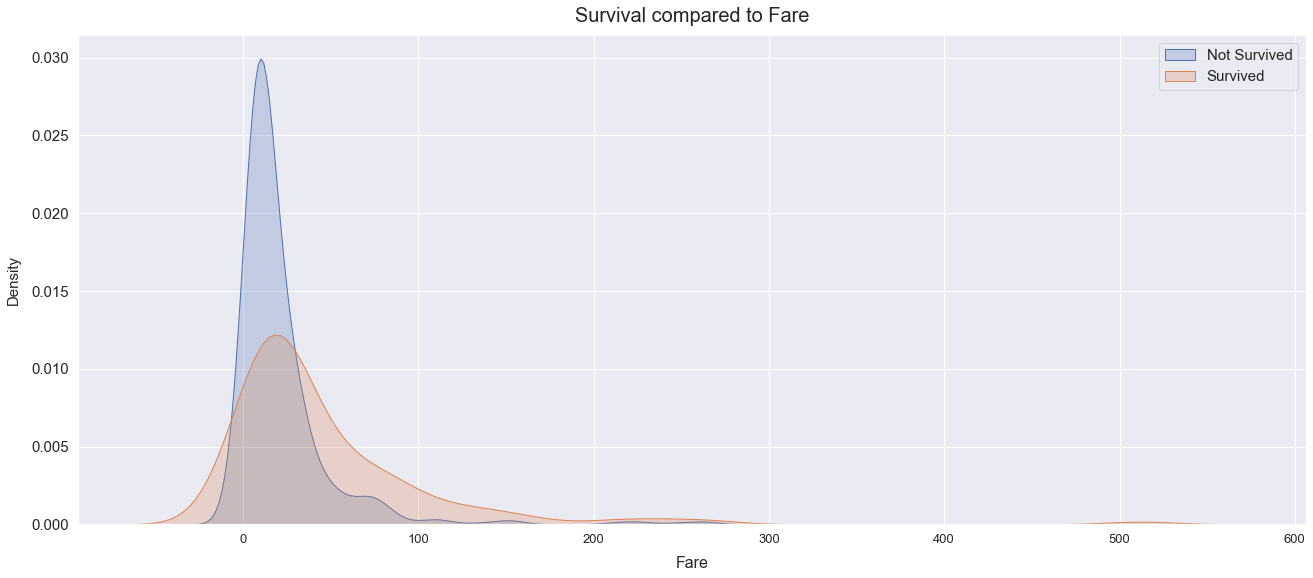

In [104]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.kdeplot(df[df['Survived'] == 0]['Fare'], fill=True, label='Not Survived')
sns.kdeplot(df[df['Survived'] == 1]['Fare'], fill=True, label='Survived')
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Density', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(prop={'size': 15})
plt.title('Survival compared to Fare', size=20, y=1, pad=13)
plt.show()



### **Insights**:
   - There was a clear correlation between sex and survival, with women having a higher survival rate.
   - Passengers in higher classes had better chances of survival, likely due to priority access to lifeboats.
   - Age played a role in survival, with younger passengers more likely to survive.
   - Fare may have influenced survival, with higher fares potentially indicating proximity to lifeboats or better accommodations.



### **Recommendations**:
   - Strategies for improving survival rates could include prioritizing vulnerable groups such as women and children during emergency situations.
   - Enhanced safety measures and protocols could be implemented to ensure equitable access to life-saving resources for all passengers.
   - Higher fares might have meant a better chance of survival, possibly because passengers paying more were closer to lifeboats or had better accommodations.

